In [130]:
# Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [131]:
#Read in data
df = pd.read_csv("movies.csv")

In [132]:
# Top 5 rows
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [133]:
# Identify total missing values
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [134]:
# Create a copy of our data
df_imputed = df.copy()

In [135]:
# This brings in our necesarry library:
from sklearn.impute import SimpleImputer

In [136]:
# First create a most_frequent imputer object.
imputer_most_frequent = SimpleImputer(strategy='most_frequent')
# This fits our Data and Transforms it using most_frequent Imputer:
df_imputed['rating'] = imputer_most_frequent.fit_transform(df_imputed['rating'].values.reshape(-1,1))

In [137]:
# Repeat
imputer_most_frequent = SimpleImputer(strategy='most_frequent')
df_imputed['released'] = imputer_most_frequent.fit_transform(df_imputed['released'].values.reshape(-1,1))

In [138]:
# Repeat
imputer_most_frequent = SimpleImputer(strategy='most_frequent')
df_imputed['writer'] = imputer_most_frequent.fit_transform(df_imputed['writer'].values.reshape(-1,1))

In [139]:
# Repeat
imputer_most_frequent = SimpleImputer(strategy='most_frequent')
df_imputed['star'] = imputer_most_frequent.fit_transform(df_imputed['star'].values.reshape(-1,1))

In [140]:
# Repeat
imputer_most_frequent = SimpleImputer(strategy='most_frequent')
df_imputed['country'] = imputer_most_frequent.fit_transform(df_imputed['country'].values.reshape(-1,1))

In [141]:
# Repeat
imputer_most_frequent = SimpleImputer(strategy='most_frequent')
df_imputed['company'] = imputer_most_frequent.fit_transform(df_imputed['company'].values.reshape(-1,1))

In [142]:
# Create an median imputer object with a median filling strategy
imputer_median = SimpleImputer(strategy='median')

In [143]:
# Apply the median imputer
df_imputed['score'] = imputer_median.fit_transform(df_imputed['score'].values.reshape(-1,1))

In [144]:
df_imputed['score'].median()

6.5

In [145]:
df_imputed['votes'] = imputer_median.fit_transform(df_imputed['votes'].values.reshape(-1,1))

In [146]:
df_imputed['votes'].median()

33000.0

In [147]:
df_imputed['budget'] = imputer_median.fit_transform(df_imputed['budget'].values.reshape(-1,1))

In [148]:
df_imputed['budget'].median()

20500000.0

In [149]:
df_imputed['gross'] = imputer_median.fit_transform(df_imputed['gross'].values.reshape(-1,1))

In [150]:
df_imputed['gross'].median()

20205757.0

In [151]:
df_imputed['runtime'] = imputer_median.fit_transform(df_imputed['runtime'].values.reshape(-1,1))

In [152]:
df_imputed['runtime'].median()

104.0

In [153]:
#Check to see if there are any missing values
df_imputed.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [154]:
# Data types for our columns
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7668 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7668 non-null   object 
 5   score     7668 non-null   float64
 6   votes     7668 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7668 non-null   object 
 9   star      7668 non-null   object 
 10  country   7668 non-null   object 
 11  budget    7668 non-null   float64
 12  gross     7668 non-null   float64
 13  company   7668 non-null   object 
 14  runtime   7668 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [155]:
# Change data type of column
df_imputed['budget'] = df_imputed['budget'].astype('int64')

df_imputed['gross'] = df_imputed['gross'].astype('int64')

In [156]:
df_imputed.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [157]:
df_imputed.sort_values(by=['gross'], inplace=False, ascending=False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


In [158]:
# Drop any duplicates

df_imputed.drop_duplicates().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


<function matplotlib.pyplot.show(close=None, block=None)>

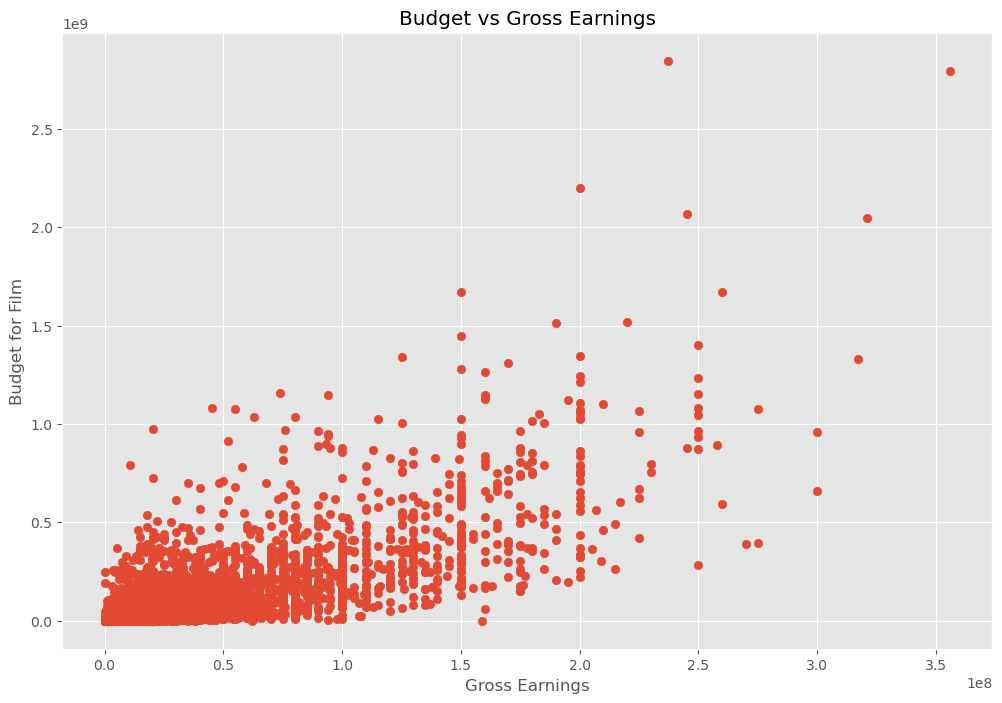

In [159]:
# Scatter plot with budget vs gross revenue
plt.scatter(x=df_imputed['budget'], y=df_imputed['gross'])
plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show


<Axes: xlabel='budget', ylabel='gross'>

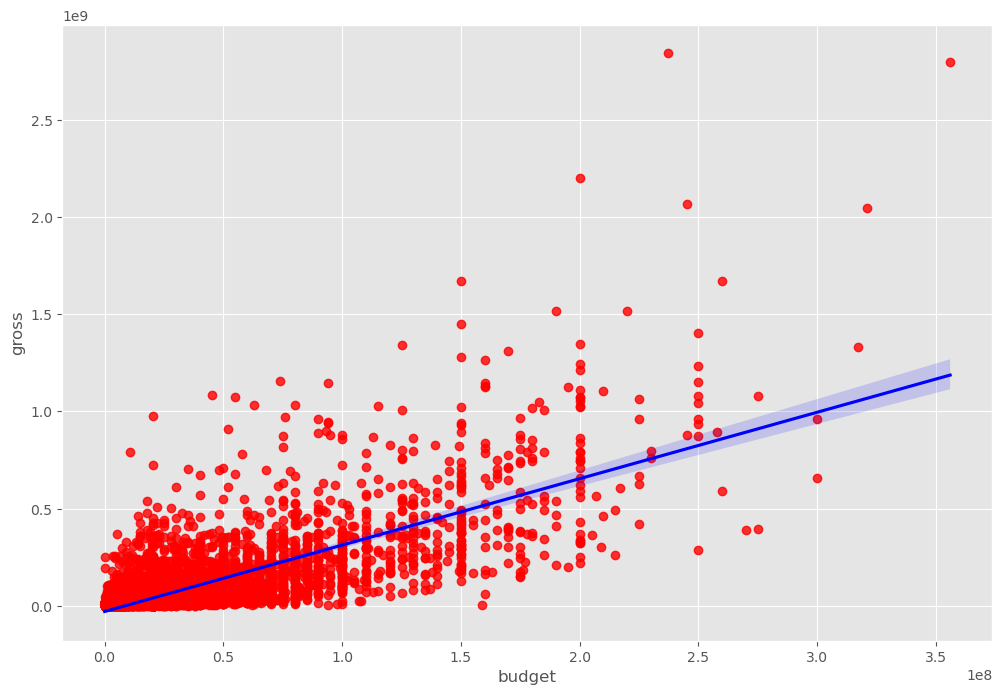

In [164]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y= 'gross', data=df_imputed, scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})

In [168]:
# Correlation
import warnings
warnings.filterwarnings('ignore')

df_imputed.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.098013,0.222573,0.291690,0.259504,0.120662
score,0.098013,1.000000,0.409157,0.061931,0.185563,0.399407
votes,0.222573,0.409157,1.000000,0.460968,0.632120,0.309151
budget,0.291690,0.061931,0.460968,1.000000,0.745881,0.273371
gross,0.259504,0.185563,0.632120,0.745881,1.000000,0.244380
runtime,0.120662,0.399407,0.309151,0.273371,0.244380,1.000000


Text(120.72222222222221, 0.5, 'Movie Features')

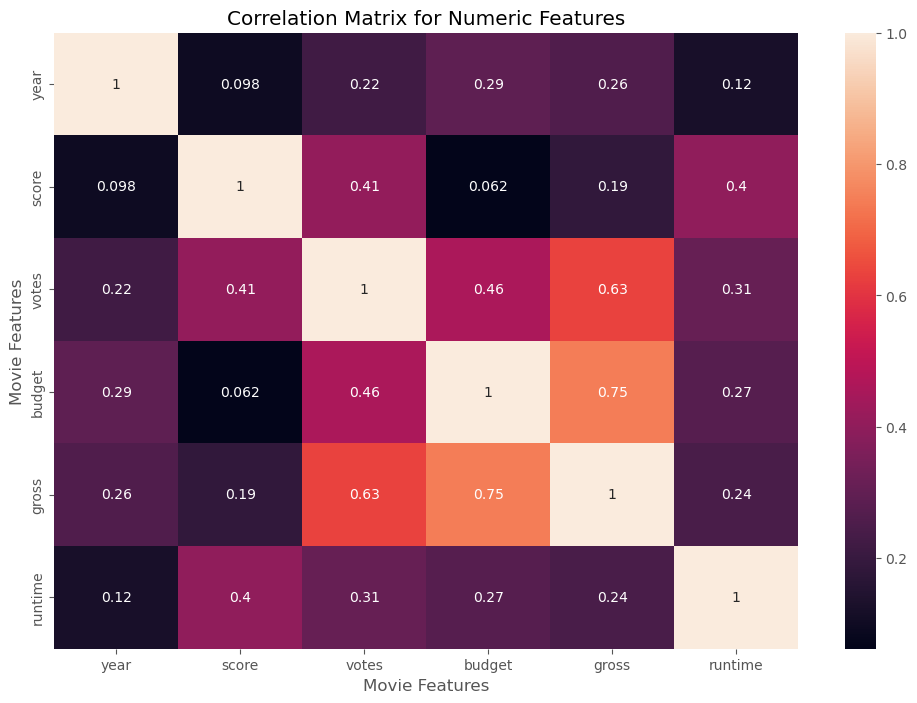

In [171]:
correlation_matrix = df_imputed.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

In [172]:
# Look at Company
df_imputed.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [174]:
df_numerized = df_imputed

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0
1,The Blue Lagoon,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0
2,Star Wars: Episode V - The Empire Strikes Back,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0
3,Airplane!,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0
4,Caddyshack,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,6,6,2020,2964,3.1,18.0,1500,2289,2421,55,7000,20205757,2281,90.0
7664,Dream Round,6,4,2020,1107,4.7,36.0,774,2614,1886,55,20500000,20205757,539,90.0
7665,Saving Mbango,6,6,2020,193,5.7,29.0,2061,2683,2040,55,58750,20205757,941,104.0
7666,It's Just Us,6,6,2020,2817,6.5,33000.0,1184,1824,450,55,15000,20205757,2281,120.0


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0
1,The Blue Lagoon,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0
2,Star Wars: Episode V - The Empire Strikes Back,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0
3,Airplane!,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0
4,Caddyshack,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,6,6,2020,2964,3.1,18.0,1500,2289,2421,55,7000,20205757,2281,90.0
7664,Dream Round,6,4,2020,1107,4.7,36.0,774,2614,1886,55,20500000,20205757,539,90.0
7665,Saving Mbango,6,6,2020,193,5.7,29.0,2061,2683,2040,55,58750,20205757,941,104.0
7666,It's Just Us,6,6,2020,2817,6.5,33000.0,1184,1824,450,55,15000,20205757,2281,120.0


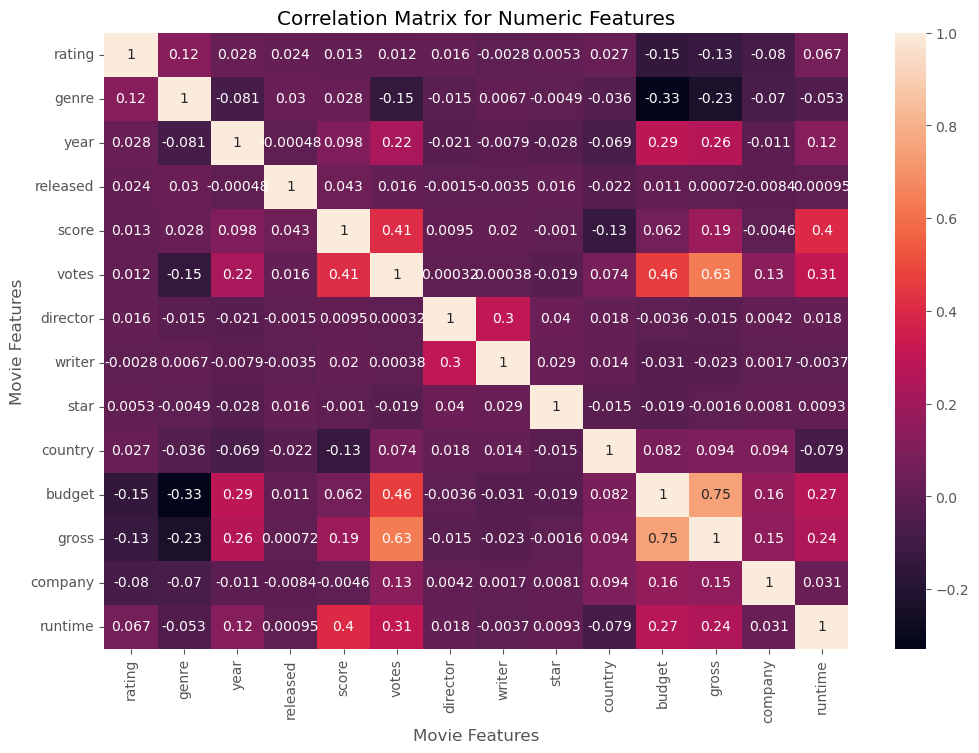

In [178]:
#Votes and Budget have the highest correlation to gross earnings.
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()